# Skin cancer classification challenge

**Summary :** Skin cancer classification

## Preliminaries and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 10, 10  #default setting
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

## I. Load Data

- **Rq : ** Datasets are quite light, can be fully loaded in a laptop memory with ease.

In [2]:
%%time
meta = pd.read_csv("../data/metadata.csv")

CPU times: user 28 ms, sys: 4 ms, total: 32 ms
Wall time: 36.5 ms


In [3]:
print(meta.shape)

(13786, 16)


- **Data integrity check**

In [4]:
#data integrity check
#variable types
def summaryze(df):
    summary =  pd.DataFrame()
    summary["column"] = list(df.columns)
    summary["type"] = list(df.dtypes)
    summary["nb_missing_values"] = list(df.isnull().sum())
    summary["nb_missing_values%"] = summary["nb_missing_values"]/len(df)*100
    summary["unique_values%"] = [len(set(df[x])) for x in list(df.columns)]
    summary.set_index("column",inplace=True)
    return summary

In [5]:
summaryze(meta)

,type,nb_missing_values,nb_missing_values%,unique_values%
column,,,,
_id,object,0,0.000000,13786
folder,object,0,0.000000,9
meta_acquisition_dermoscopic_type,object,11669,84.643842,2
meta_acquisition_image_type,object,0,0.000000,2
meta_acquisition_pixelsX,int64,0,0.000000,140
meta_acquisition_pixelsY,int64,0,0.000000,130
meta_clinical_age_approx,float64,352,2.553315,370
meta_clinical_benign_malignant,object,15,0.108806,6
meta_clinical_clin_size_long_diam_mm,float64,12251,88.865516,12305


## II. Global Statistical Analysis

In [6]:
set(meta.meta_clinical_benign_malignant)

{nan,
 'benign',
 'indeterminate',
 'indeterminate/benign',
 'indeterminate/malignant',
 'malignant'}

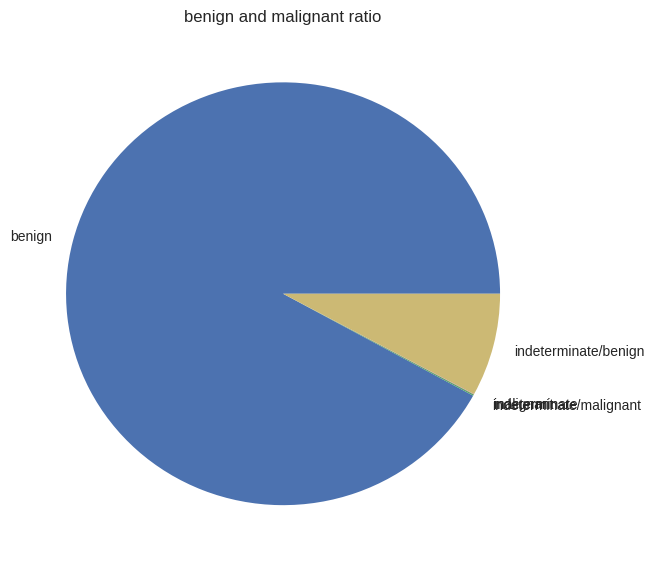

In [7]:
fig = plt.figure(figsize=(7,7),dpi=100)
temp = meta.groupby(meta.meta_clinical_benign_malignant).size()
temp = plt.pie(temp, labels=list(set(meta.meta_clinical_benign_malignant.dropna())))
plt.title("benign and malignant ratio")
plt.show()

In [8]:
len(meta[meta["meta_clinical_benign_malignant"]=="malignant"])

1084

In [9]:
len(meta[meta["meta_clinical_benign_malignant"]=="malignant"])/float(len(meta))

0.07863049470477296

> ### some sampling might be needed